# All Other Models 

### Decision Tree Model 

In [10]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
df=pd.read_csv('final_lebron.csv')

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pandas as pd 
import numpy as np

In [11]:
x_feats2 = ['age', 'mp', 'fg','fga','fgp','three','threeatt', 'threep', 'ft', 'ftp', 'fta', 'team', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pts', 'game_score', 'plus_minus']
X2 = pd.get_dummies(df[x_feats2], drop_first=True)
# y= df.result 

In [12]:
y= pd.get_dummies(df['result'], drop_first=True)

In [13]:
y['W'] = y['W'].astype(int)

In [14]:
X2['EFG']= ((X2['fg'])+(X2['three']*(.5)))/(X2['fga'])
X2['AtoT'] = X2['ast']/X2['tov']

In [15]:
X2=X2.replace([np.inf, -np.inf], np.nan)

In [16]:
X2 = X2.fillna(value=0)

In [51]:
X_train, X_test , y_train, y_test = train_test_split(X2, y, test_size = 0.3, random_state = 10) 


In [19]:
classifier = DecisionTreeClassifier(random_state=42, criterion = "gini", max_depth = 5)  
model=classifier.fit(X_train, y_train) 

In [20]:
y_pred = classifier.predict(X_test)

In [21]:
# Calculate Accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

Accuracy is :87.6470588235294

AUC is :0.85


In [22]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

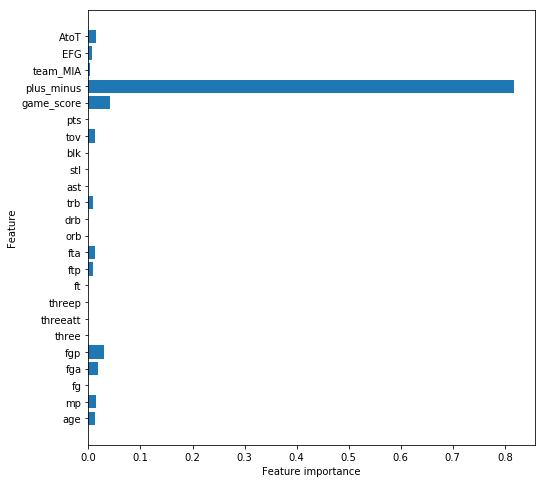

In [23]:
plot_feature_importances(model)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [27]:
#Confusion Matrix Fuction
def confusion_func(clf, X_test, y_test):
    
    sns.set_style('whitegrid')
    plt.figure(figsize = (9, 9))
    plt.title(f'Confusion Matrix - {clf.__class__.__name__}')
    
    cm_lr = confusion_matrix(y_test, clf.predict(X_test))
    
    return sns.heatmap(cm_lr, annot = True, fmt = 'g', linewidths = .5, square = True, cmap = "Blues")

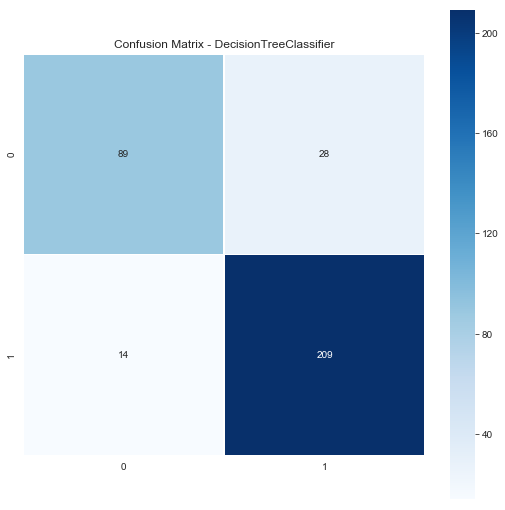

In [28]:
confusion_func(model, X_test, y_test)

## Random Forest Model 

In [29]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline

In [30]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
forest.score(X_train, y_train)

0.9924242424242424

In [32]:
forest.score(X_test, y_test)

0.8676470588235294

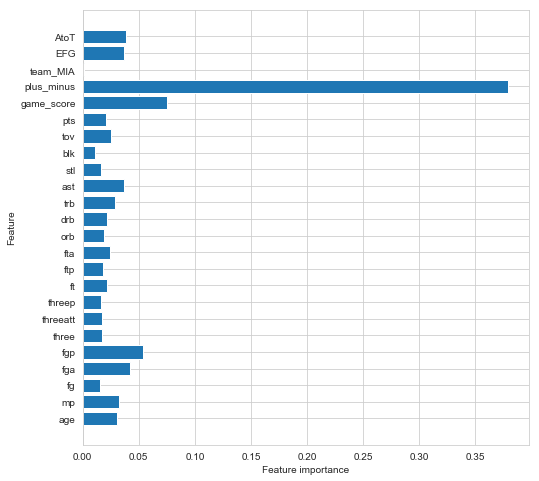

In [33]:
plot_feature_importances(forest)

In [34]:
param_gridforest = {
    "max_depth": [1, 5, 8, 10],
    'max_features': [5, 10, 15, 24],
    'max_leaf_nodes': [5, 10, 20, 40],
    'n_estimators': [ 50, 100, 150, 200],
    'random_state': [10, 42, 50, 65],
}

In [ ]:
grid_clf = GridSearchCV(forest, param_gridforest, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X2, y)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

In [ ]:
# Grid search results, just didnot want to run again 

In [ ]:
# Grid Search found the following optimal parameters: 
# max_depth: 1
# max_features: 10
# max_leaf_nodes: 5
# n_estimators: 50
# random_state: 65

# Training Accuracy: 89.52%
# Validation accuracy: 90.0%

In [ ]:
confusion_func(grid_clf, X_test, y_test)

In [ ]:
# Results for confusion matrix in draft2 notebook for now 

## XG Boost Model 

In [46]:
import xgboost as xgb
np.random.seed(0)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline

In [47]:
# to help kernel not die when running XG Boost 
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [48]:
X4 = pd.DataFrame(X2)
y3 = pd.DataFrame(y)

In [49]:
X_train, X_test , y_train, y_test = train_test_split(X4, y3, test_size = 0.3, random_state = 10) 

In [39]:
xclf = xgb.XGBClassifier()
xclf.fit(X_train, y_train)
training_preds = xclf.predict(X_train)
val_preds = xclf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 97.6%
Validation accuracy: 91.47%


In [40]:
# Results were - Training Accuracy: 91.41% and - Validation accuracy: 93.82%
param_grid = {
    "learning_rate": [1],
    'max_depth': [6],
    'min_child_weight': [10],
    'subsample': [ 0.7],
    'n_estimators': [5, 30, 100, 250],
}

In [ ]:
#Did not run in this notebook 
grid_clf = GridSearchCV(xclf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X3, y)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

In [ ]:
#RESULTS FOR BEST GRID SEARCH 

In [ ]:
# Grid Search found the following optimal parameters: 
# learning_rate: 1
# max_depth: 6
# min_child_weight: 10
# n_estimators: 5
# subsample: 0.7

# Training Accuracy: 91.41%
# Validation accuracy: 93.82%

In [41]:
#XG boost with best gridsearch results 
xclfG = xgb.XGBClassifier(learning_rate=.8, max_depth=12, min_child_weight=10, n_estimators=12, subsample=0.9)
xclfG.fit(X_train, y_train)
training_preds = xclfG.predict(X_train)
val_preds = xclfG.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))
# didnt get same results so started putting other values in
# is it better to have both numbers higher? or have numbers in 90's but closer in range?

Training Accuracy: 92.42%
Validation accuracy: 91.18%


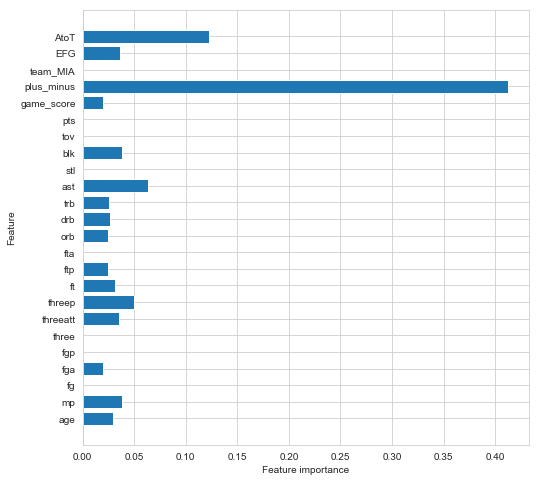

In [43]:
plot_feature_importances(xclfG)

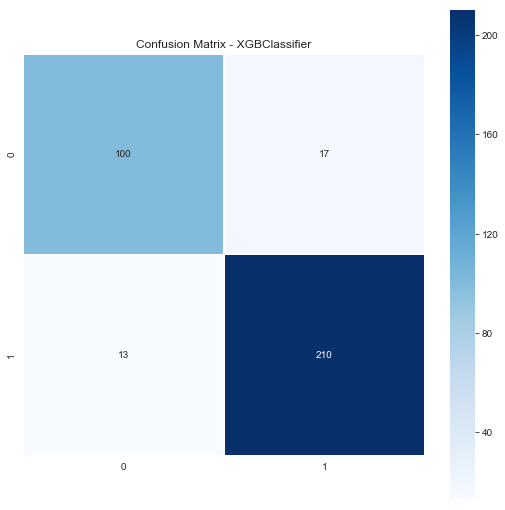

In [44]:
confusion_func(xclfG, X_test, y_test)

In [52]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.dummy import DummyClassifier

def print_metrics(test, preds):
    print("Precision Score: {}".format(precision_score(test, preds)))
    print("Recall Score: {}".format(recall_score(test, preds)))
    print("Accuracy Score: {}".format(accuracy_score(test, preds)))
    print("F1 Score: {}".format(f1_score(test, preds)))
	
# Fitting and training the dummy
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)

# Dummy predictions
dum_pred = dummy.predict(X_test)

#Printing out results
print_metrics(y_test, dum_pred)

AttributeError: 'list' object has no attribute 'argmax'